<a href="https://colab.research.google.com/github/CryTechno/DIP/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна Робота №4
# Виконав студент Рогожніков Роман ПБ-21мп
# Завдання
## 1. Збільшити датасет
1.1 Отримати список зображень у директорії "./assignemnts/dataset"

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
img_list = os.listdir(path="/content/drive/MyDrive/obrob/assignments/dataset") 

1.2 Реалізувати функцію аугментації зображення шляхом комбінацій наступних перетворень:
* поелементне перетворення:<br>
  - інверсія яскравості пікселів
  - гамма корекція яскравості пікселів
* просторова фільтраці:
  - згладжування зображення
* геометричне перетворення:
  - перевернути зображення горизонтально/вертикально
  - переміщення зображення
  - обертання зображення
  - перекіс зображення

In [45]:
def gammaCorrection(src, gamma):
    invGamma = 1 / gamma
    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)
    return cv2.LUT(src, table)
    
def data_augmentation(img,i):
    image = cv2.imread(img+i)
    imageInv = ~image
    cv2.imwrite("./test/"+i[:-4]+"_"+"img_inv.png",imageInv)
    plt.figure(figsize=(10, 10))
    plt.subplot(421)
    plt.imshow(imageInv),plt.title('Inverted')
    
    gammaImg = gammaCorrection(image, 2.2)
    cv2.imwrite("./test/"+i[:-4]+"_"+"gamma_corrected.png",gammaImg)
    plt.subplot(422)
    plt.imshow(gammaImg),plt.title('gamma_corrected')
    
    kernel = np.ones((5,5),np.float32)/25
    dst = cv2.filter2D(image,-1,kernel)
    cv2.imwrite("./test/"+i[:-4]+"_"+"filtered.png",dst)
    plt.subplot(423)
    plt.imshow(dst),plt.title('filtered')
    
    flippedImageHor= cv2.flip(image, 1)
    flippedImageVert = cv2.flip(image,0)
    cv2.imwrite("./test/"+i[:-4]+"_"+"flippedImageHor.png",flippedImageHor)
    cv2.imwrite("./test/"+i[:-4]+"_"+"flippedImageVert.png",flippedImageVert)
    plt.subplot(424)
    plt.imshow(flippedImageHor),plt.title('flippedImageHor')
    
    shape = image.shape
    height = shape[0]
    width = shape[1]
    M_hor = np.float32([[1, 0, width/2], [0, 1, 0]])
    M_ver = np.float32([[1, 0, 0], [0, 1, height/2]])
    M = np.float32([[1, 0, width/2], [0, 1, height/2]])
    img_trhor = cv2.warpAffine(image, M_hor, (width, height))
    img_trver = cv2.warpAffine(image, M_ver, (width, height))
    img_tr = cv2.warpAffine(image, M, (width, height))
    cv2.imwrite("./test/"+i[:-4]+"_"+"img_trhor.png",img_trhor)
    cv2.imwrite("./test/"+i[:-4]+"_"+"img_trver.png",img_trver)
    cv2.imwrite("./test/"+i[:-4]+"_"+"img_tr.png",img_tr)
    plt.subplot(425)
    plt.imshow(img_tr),plt.title('Affined')
    
    M90 = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
    img_rot90 = cv2.warpAffine(image, M90, (width, height))
    cv2.imwrite("./test/"+i[:-4]+"_"+"rot90.png",img_rot90)    
    plt.subplot(426)
    plt.imshow(img_rot90),plt.title('Rotated')
    
    M_sk1 = np.float32([[1,1,1], [0,1,1]])
    sk1 = cv2.warpAffine(image, M_sk1, (width, height))
    cv2.imwrite("./test/"+i[:-4]+"_"+"perekis.png",sk1)
    plt.subplot(427)
    plt.imshow(sk1),plt.title('Perekis')

1.3 Для кожного зображення зі списку **img_list**, використовуючи функцію **data_augmentation**, виконати 10 доповнень та зберегти результат у директорії "./assignemnts/dataset":

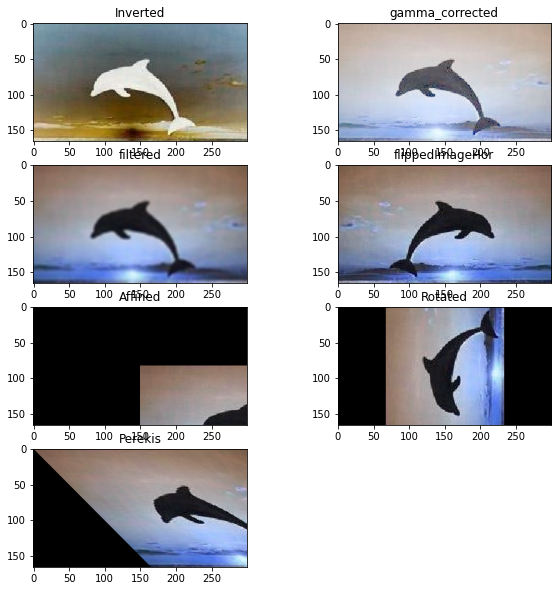

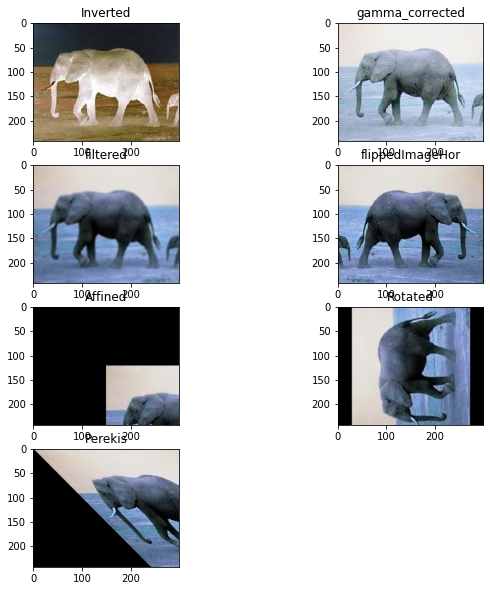

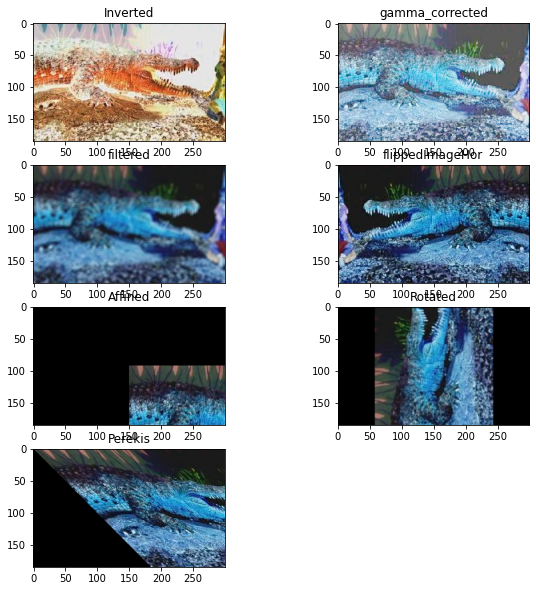

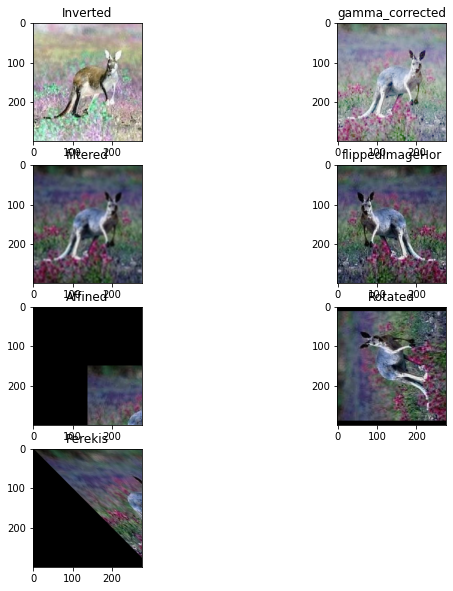

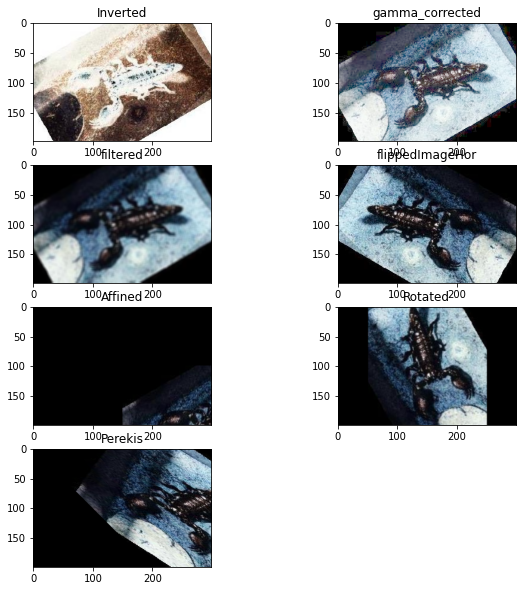

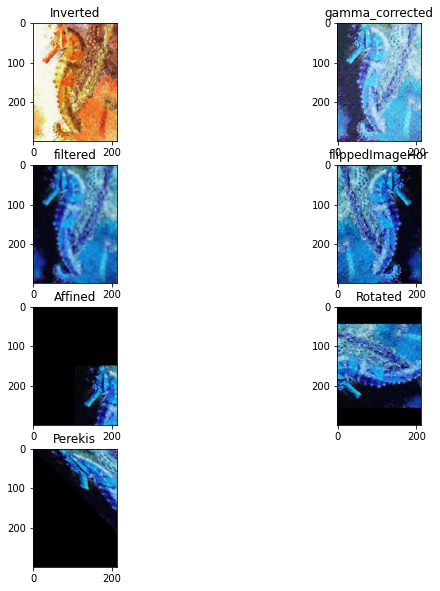

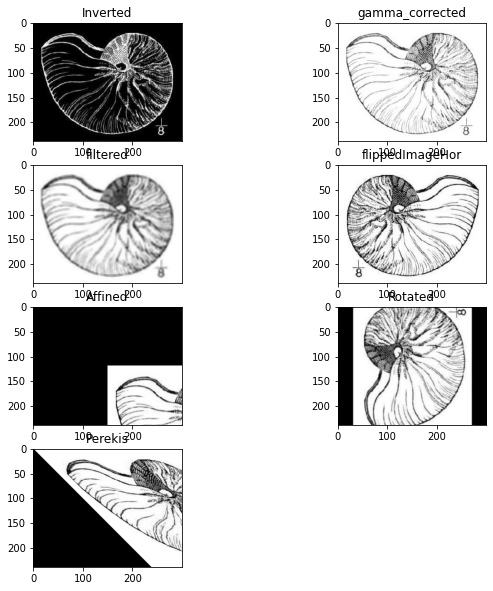

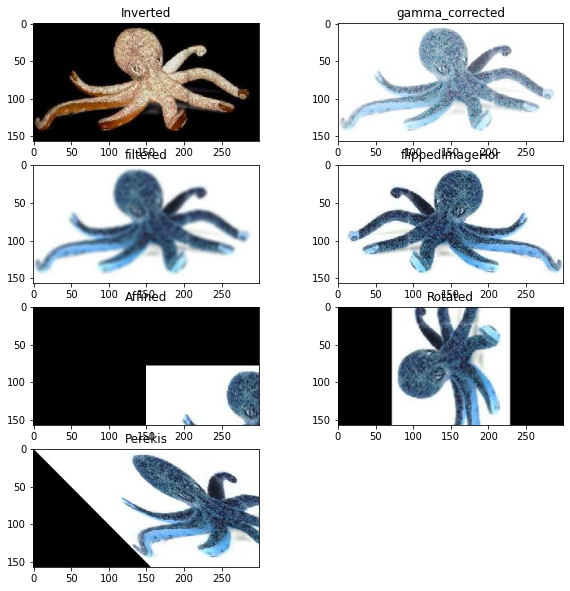

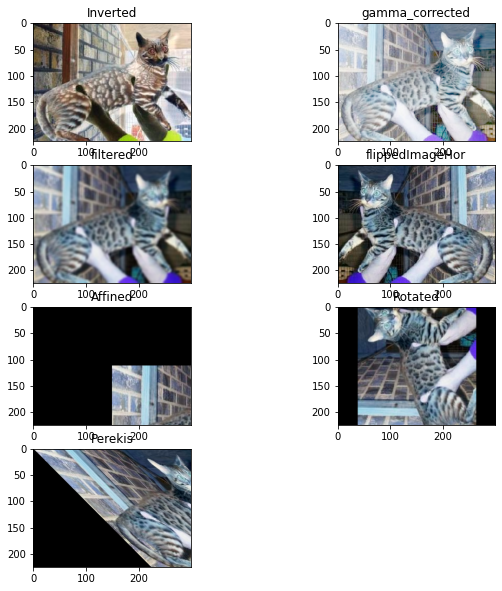

In [46]:
for i in img_list[1:]: 
    data_augmentation('/content/drive/MyDrive/obrob/assignments/dataset/', i)

## 2. Зробити перетворення перспективи вхідного зображення для визначення меж дорожньої розмітки
<table><tr>
<td> <img src="https://github.com/CryTechno/DIP/blob/main/assignments/test_img.jpg?raw=1" height="300" width="300"> </td>

</tr></table>

2.1. Відкрити та завантажити наступне зображення:
    * assignments/test_img.jpg

In [48]:
img = cv2.imread("/content/drive/MyDrive/obrob/assignments/test_img.jpg")

2.2 Задати розмір вихідного зображення:

In [49]:
OUT_IMG_WIDTH = 500
OUT_IMG_HEIGHT = 500

2.3 Задати координати ROI вхідного зображення: 

In [51]:
src = np.float32([[620,430], [670, 430], [1050, 700],[200,700]])

2.4 Задати координати ROI вихідного зображення: 

In [50]:
dst = np.float32([[0,0],[OUT_IMG_WIDTH,0],[OUT_IMG_WIDTH,OUT_IMG_WIDTH],[0,OUT_IMG_WIDTH]])

2.5 Визначити матрицю перетворення перспективи

In [53]:
M = cv2.getPerspectiveTransform(src, dst)

2.6 Виконати перетворення перспективи

In [54]:
out = cv2.warpPerspective(img, M, (OUT_IMG_WIDTH,OUT_IMG_HEIGHT))

2.7 Відобразити вихідне зображення

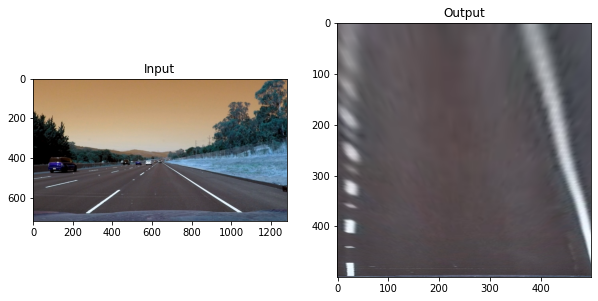

In [55]:
plt.figure(figsize=(10, 10))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(out),plt.title('Output')
plt.show()

### 3*. Реалізувати геометричне перетворення зображеннь (не використовуючи функції OpenCV)
Перетворення координат:
* афінне перетворення*
* перетворення перспективи

Інтерполяція яскравості пікселів:
* методом найближчого сусіда
* білінійна інтерполяція**
* бікубічна інтерполяція***